## Question 4: Data Visualization (30 points)


Before doing so, we import our cleaned datasets and appropriate packages to assist visualization

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from scipy.stats import linregress
from analyze_visits import new_data
dt, mean1, mean2, correlation, season_speed = new_data()

### 1.Walking speed analysis:
Scatter plot of age vs walking speed with regression line



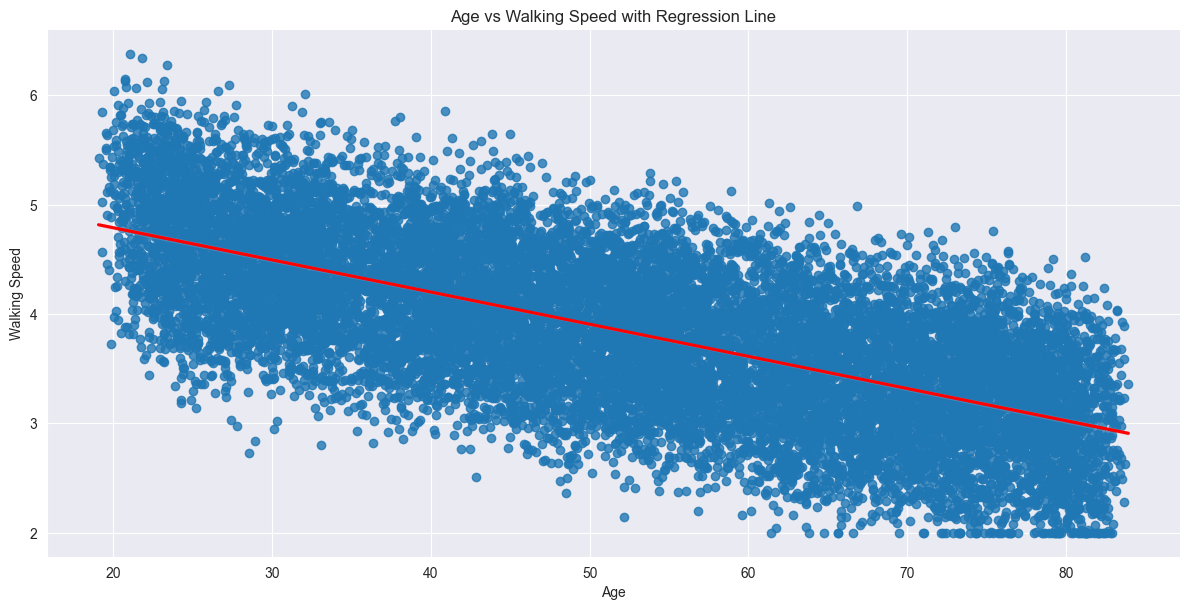

In [20]:
sns.lmplot(x='age', y='walking_speed', data=dt, aspect=2, height=6, line_kws={'color': 'red'})
plt.title('Age vs Walking Speed with Regression Line')
plt.xlabel('Age')
plt.ylabel('Walking Speed')
plt.show()

We can see that the larger the age is, the less the walking speed through this trend. 

Box plots by education level

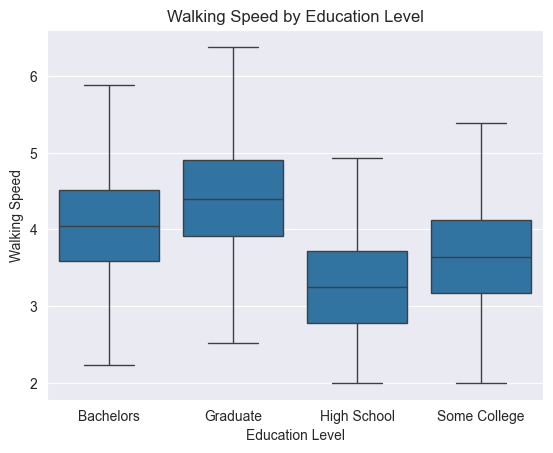

In [5]:
sns.boxplot(x='education_level', y='walking_speed', data=dt)
plt.title('Walking Speed by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Walking Speed')
plt.show()

We can see that the median walking speed from graduates are the highest, with bachelors in second, some college in third, and high school in fourth.

Line plot showing education age interaction

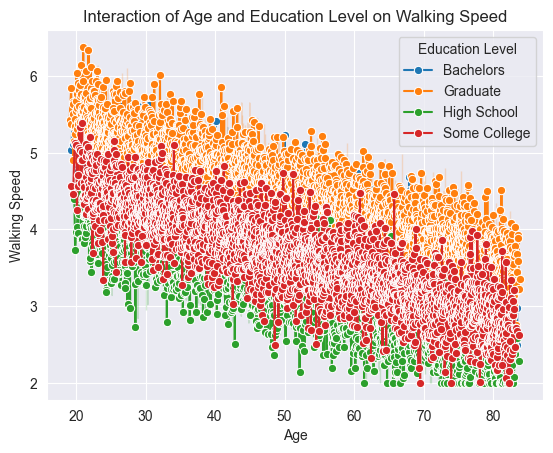

In [23]:
sns.lineplot(x='age', y='walking_speed', hue='education_level', data=dt, marker='o')
plt.title('Interaction of Age and Education Level on Walking Speed')
plt.xlabel('Age')
plt.ylabel('Walking Speed')
plt.legend(title='Education Level')
plt.show()

Interactive dashboard

In [24]:
fig = px.scatter(dt, x='age', y='walking_speed', color='education_level', title="Age vs Walking Speed")
fig.show()

We can see that overall graduates walk faster even though limiting to the same age.

### 2. Cost analysis:
Bar plot of mean costs by insurance type

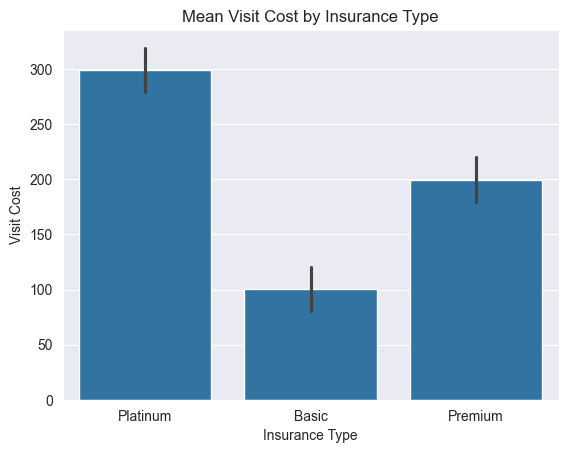

In [11]:
sns.barplot(x='insurance_type', y='visit_cost', data=dt, errorbar='sd')
plt.title('Mean Visit Cost by Insurance Type')
plt.xlabel('Insurance Type')
plt.ylabel('Visit Cost')
plt.show()

Box plots showing cost distributions

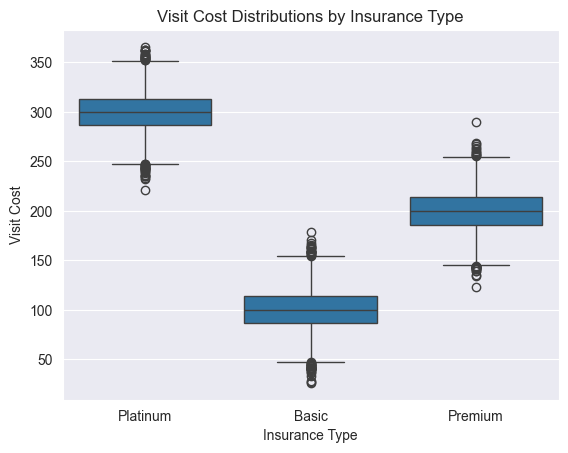

In [13]:
sns.boxplot(x='insurance_type', y='visit_cost', data=dt)
plt.title('Visit Cost Distributions by Insurance Type')
plt.xlabel('Insurance Type')
plt.ylabel('Visit Cost')
plt.show()

### 3. Combined visualizations:

Pair plot of key variables

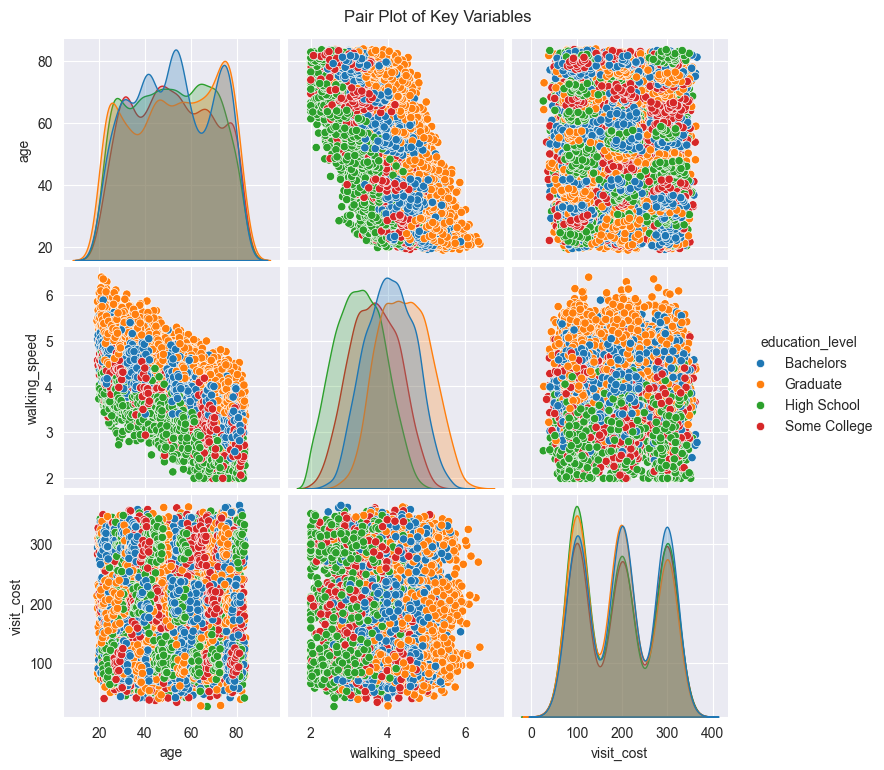

In [16]:
sns.pairplot(dt[['age', 'walking_speed', 'visit_cost', 'education_level']], hue='education_level')
plt.suptitle('Pair Plot of Key Variables', y=1.02)
plt.show()

Faceted plots by education/insurance

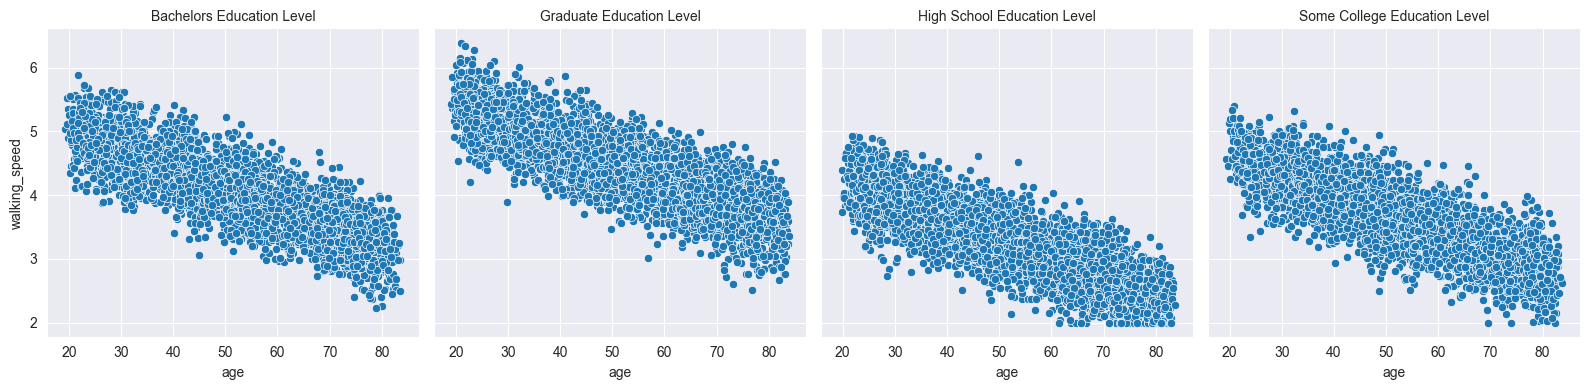

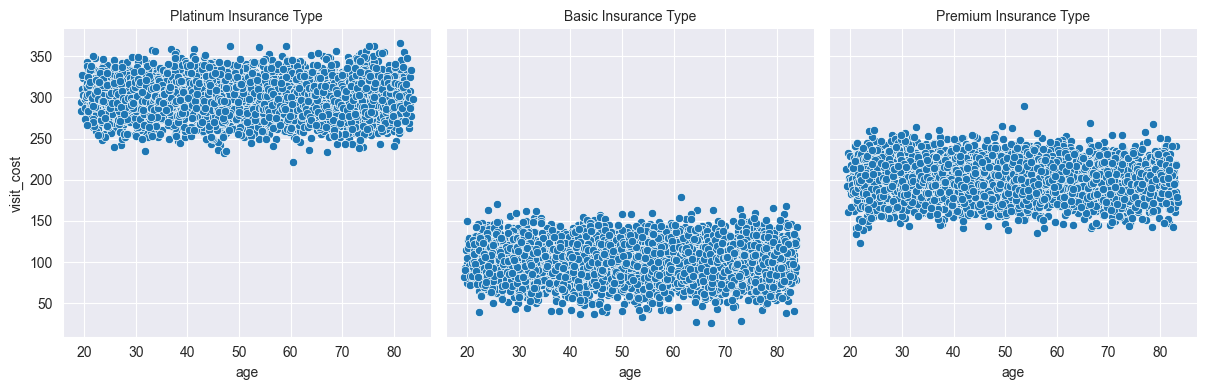

In [17]:
# Facet plot by education
g = sns.FacetGrid(dt, col='education_level', col_wrap=4, height=4)
g.map(sns.scatterplot, 'age', 'walking_speed')
g.set_titles('{col_name} Education Level')
plt.show()

# Facet plot by insurance type
g = sns.FacetGrid(dt, col='insurance_type', col_wrap=4, height=4)
g.map(sns.scatterplot, 'age', 'visit_cost')
g.set_titles('{col_name} Insurance Type')
plt.show()

Time trends where relevant

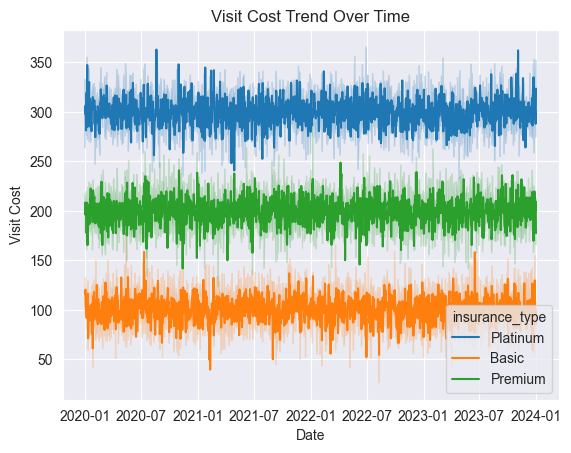

In [18]:
dt['visit_date'] = pd.to_datetime(dt['visit_date'])  # Assuming there's a 'visit_date' column
sns.lineplot(x='visit_date', y='visit_cost', data=dt, hue='insurance_type')
plt.title('Visit Cost Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Visit Cost')
plt.show()

heatmap

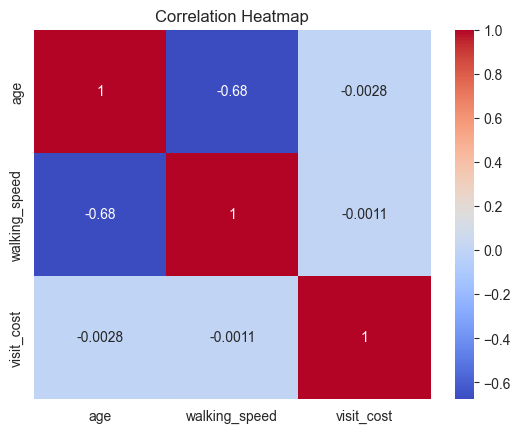

In [21]:
corr = dt[['age', 'walking_speed', 'visit_cost']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()